In [2]:
import pandas as pd
import numpy as np
from src.environment import calcScore
import matplotlib.pyplot as plt
import os
import re

In [3]:
import os
import re

def read_best_species(folder_path):
    run_data = {}
    pattern = re.compile(r"\d{4}-\d{2}-\d{2}_\d{6}_run(\d+)_best_species_timeline\.txt$")

    for filename in os.listdir(folder_path):
        match = pattern.match(filename)
        if match:
            run_number = int(match.group(1))
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r', encoding='utf-8') as f:
                content = f.read()
                array_strings = content.strip().split('[')[1:]
                array_strings = [array_string.strip()[:-1] for array_string in array_strings]

                arrays = [np.fromstring(array_string, sep=" ", dtype=int) for array_string in array_strings]
                run_data[run_number] = arrays

    return run_data

In [5]:
runs = read_best_species("out")

In [7]:
scores = {run_id: np.array([calcScore(array, 19) for array in arrays]) for run_id, arrays in runs.items()}

A counterexample has been found! State: 
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
A counterexample has been found! State: 
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
def plot_run_data(run_dict):
    """
    Visualizes a dictionary of run data using matplotlib.
    
    Each key is an integer run_id, and each value is a NumPy array of floats.
    All arrays are plotted as separate lines with run_id as the legend.
    
    :param run_dict: dict {run_id (int): np.array(float)}
    """
    plt.figure(figsize=(12, 6))
    
    for run_id, data in run_dict.items():
        x = np.arange(len(data))
        
        plt.plot(x, data, label=f'Run {run_id}', linewidth=1)

    plt.title("Score development by iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Score")
    plt.legend(loc='lower right', fontsize='small', ncol=2)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

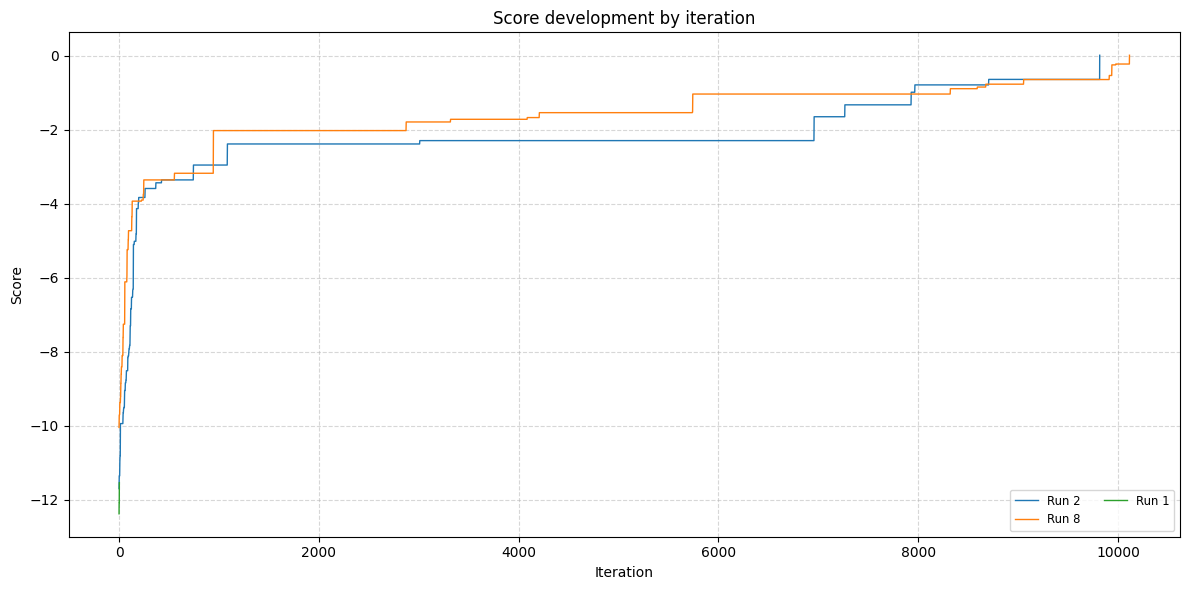

In [9]:
plot_run_data(scores)